In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet
with open('C:\ML Project\SMS-Spam-Detector\spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df = pd.read_csv('C:\ML Project\SMS-Spam-Detector\spam.csv',encoding='Windows-1252')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
186,ham,"Haha awesome, be there in a minute",NaN,NaN,NaN
2159,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
5324,ham,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee...",NaN,NaN,NaN
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
664,ham,Yes baby! We can study all the positions of th...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
### Data Cleaning ###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## dropping last 3 columns due to less non-null values ##

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
## Renaming columns ##

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
1183,ham,Am i that much bad to avoid like this?
4058,spam,Moby Pub Quiz.Win a å£100 High Street prize if...
4657,ham,This message is from a great Doctor in India:-...
4425,ham,Was it something u ate?
2291,ham,Remind me how to get there and I shall do so


In [9]:
## applying label encoder ##

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Text
3868,0,No let me do the math. Your not good at it.
5473,0,Ok lor Ì_ reaching then message me.
4157,0,It certainly puts things into perspective when...
2043,1,4mths half price Orange line rental & latest c...
2502,0,Ola would get back to you maybe not today but ...


In [11]:
## Checking for missing values ##

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [12]:
## checking duplicates ##

df.duplicated().sum()

## dropping duplicates ##

df = df.drop_duplicates(keep = 'first')

In [13]:
## Performing Exploratory Data Analysis ##

df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
## finding no. of characters in msg ##
df['num_of_characters'] = df['Text'].apply(len)
df.sample(5)

,Target,Text,num_of_characters
3431,1,Camera - You are awarded a SiPix Digital Camer...,106
3908,0,Serious? What like proper tongued her,37
1522,0,I thk u dun haf 2 hint in e forum already lor....,96
4629,0,Everybody had fun this evening. Miss you.,41
122,1,Todays Voda numbers ending 7548 are selected t...,156


In [17]:
## finding no. of words in msg ##
df['num_of_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
## finding no. of sentences in msg ##
df['num_of_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,Target,Text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
## analysing dataset ##

df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
## Analysing ham msgs ##

df[df['Target']== 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
## Analysing spam msgs ##

df[df['Target']== 1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='num_of_characters', ylabel='Count'>

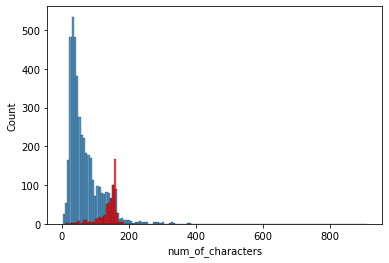

In [24]:
## histogram for characters in spam msgs ##
sns.histplot(df[df['Target']== 0]['num_of_characters'])
sns.histplot(df[df['Target']== 1]['num_of_characters'],color='red')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

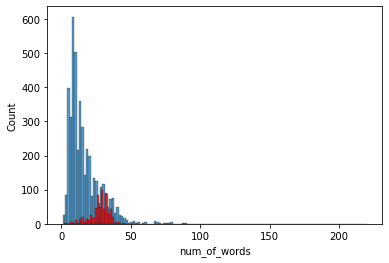

In [25]:
## histogram for words in spam msgs ##
sns.histplot(df[df['Target']== 0]['num_of_words'])
sns.histplot(df[df['Target']== 1]['num_of_words'],color='red')

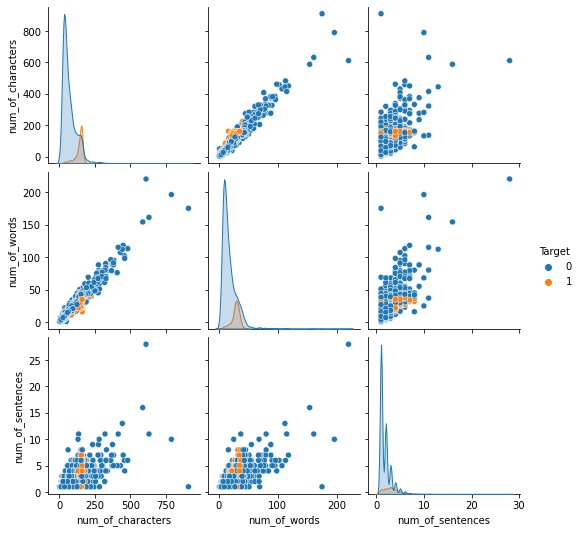

In [26]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

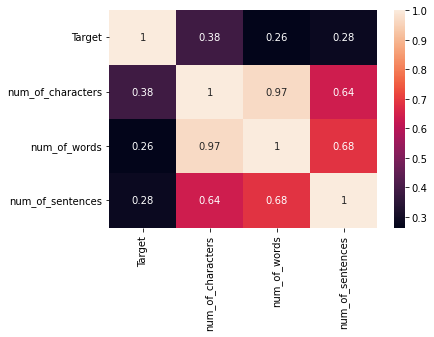

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [32]:
df.head()

,Target,Text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'